In [114]:
import pickle
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [115]:
import pandas as pd
import numpy as np
pdata = pd.DataFrame.from_dict(data_dict, orient='index')
pdata.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

In [116]:
pdata = pdata.replace('NaN', np.nan, regex=True)
temp = []
for el in pdata['email_address'].values:
    if type(el) == float:
        temp.append(False)
    else:
        temp.append(True)
pdata['has_email_data'] = temp
pdata['total_navalue_count'] = pdata.isnull().sum(axis=1)
pdata['sal_navalue_count'] = pdata[['salary', 'deferral_payments', 'long_term_incentive', 'total_payments', 'bonus', 'expenses', 'loan_advances', 'other', 'director_fees', 'deferred_income']].isnull().sum(axis=1)
pdata['stock_navalue_count'] = pdata[['exercised_stock_options', 'restricted_stock', 'total_stock_value']].isnull().sum(axis=1)
pdata = pdata.drop('email_address', 1)
pdata = pdata.replace(np.nan, 0, regex=True)
pdata = pdata[pdata.index != 'TOTAL']
pdata = pdata[pdata.index != 'SKILLING JEFFREY K']
# pdata = pdata[pdata.index != 'LAY KENNETH L'] # took out during pca analysis
# pdata = pdata[pdata.index != 'FREVERT MARK A'] # took out during pca analysis
pdata = pdata[pdata.index != 'BELFER ROBERT']
pdata = pdata[pdata.index != 'BHATNAGAR SANJAY']
pdata['short_gain'] = pdata['exercised_stock_options'] - pdata['long_term_incentive']
pdata['sal_ratio'] = pdata['salary'] / pdata['total_payments']
pdata['nonsal_ratio'] = (pdata['bonus'] + pdata['long_term_incentive'] + pdata['expenses']) / pdata['total_payments']
pdata['stock_ratio'] = pdata['restricted_stock'] / pdata['total_stock_value']
pdata['em_ratio'] = (pdata['shared_receipt_with_poi'] + pdata['from_this_person_to_poi'] + pdata['from_poi_to_this_person'] ) / (pdata['to_messages'] + pdata['from_messages'])
pdata['total_total'] = pdata['total_payments'] + pdata['total_stock_value']
pdata['from_ratio'] = pdata['from_this_person_to_poi'] / pdata['from_messages']
pdata['sent_ratio'] = (pdata['from_poi_to_this_person'] + pdata['shared_receipt_with_poi']) / pdata['to_messages']
pdata['fromto_ratio'] = pdata['from_ratio'] + pdata['sent_ratio']
pdata['bonusexpsal'] = pdata['bonus'] + pdata['expenses'] + pdata['salary']
pdata['sal_def'] = pdata['salary'] + abs(pdata['deferred_income'])

In [118]:
pdata = pdata.replace(np.nan, 0, regex=True)
pdata = pdata.replace(np.inf, 0, regex=True)
pdata = pdata.replace(-np.inf, 0, regex=True)
pdict = pdata.T.to_dict()

In [119]:
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [120]:
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 
                 'total_payments', 'exercised_stock_options', 
                 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 
                 'total_stock_value', 'from_messages', 'deferred_income', 
                 'other', 'from_this_person_to_poi', 'director_fees',
                 'long_term_incentive', 'from_poi_to_this_person',
                 'sal_ratio', 'stock_ratio', 'bonusexpsal', 'nonsal_ratio', 'stock_navalue_count',
                 'em_ratio', 'has_email_data', 'total_navalue_count',
                 'total_total', 'short_gain', 'sal_navalue_count', 'fromto_ratio']
# 'from_ratio', 'sent_ratio',

In [121]:
my_dataset = pdict
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [122]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
features = scaler.fit_transform(features)

In [123]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [124]:
from sklearn.feature_selection import SelectKBest
x_new = SelectKBest(k=10)
x_new.fit_transform(features_train, labels_train)
for i in range(len(x_new.scores_)):
    if x_new.get_support()[i]:
        print(features_list[i+1], x_new.scores_[i])
best = []
for i in range(len(x_new.get_support())):
    if x_new.get_support()[i]:
        best.append(features_list[i+1])

('salary', 6.4679679843454627)
('shared_receipt_with_poi', 7.1818771442764069)
('deferred_income', 17.17552763271879)
('bonusexpsal', 9.559316692235166)
('nonsal_ratio', 12.369312712856718)
('em_ratio', 8.2832315549109197)
('total_navalue_count', 7.558259797411444)
('total_total', 4.1176785774775935)
('sal_navalue_count', 11.707644067293582)
('fromto_ratio', 11.269952240225802)


In [125]:
features_list = ['poi']
for el in best:
    features_list.append(el)

In [126]:
features_list

['poi',
 'salary',
 'shared_receipt_with_poi',
 'deferred_income',
 'bonusexpsal',
 'nonsal_ratio',
 'em_ratio',
 'total_navalue_count',
 'total_total',
 'sal_navalue_count',
 'fromto_ratio']

In [127]:
features_list = ['poi',
 'salary',
 'shared_receipt_with_poi',
 'deferred_income',
 'bonusexpsal',
 'nonsal_ratio',
 'em_ratio',
 'total_navalue_count',
 'total_total',
 'sal_navalue_count',
 'fromto_ratio']

In [128]:
my_dataset = pdict
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [129]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [135]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_validation import StratifiedShuffleSplit
pipe_dtc = Pipeline([('scl', MinMaxScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', DecisionTreeClassifier(random_state=1))])
cv = StratifiedShuffleSplit(labels_train, n_iter=10, random_state = 42)
mss_range = [2, 10, 20, 30, 40]
param_grid = [{'clf__min_samples_split': mss_range,
               'clf__criterion': ['entropy', 'gini']}]
gs = GridSearchCV(estimator=pipe_dtc,
                  param_grid = param_grid,
                  scoring = 'f1_weighted',
                  cv = cv,
                  n_jobs=-1)
# clf = gs.fit(features_train, labels_train)
clf = gs.fit(features, labels)
print(clf.best_score_)
print(clf.best_params_)

0.920893409996
{'clf__criterion': 'entropy', 'clf__min_samples_split': 40}


/Users/frankcorrigan/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/frankcorrigan/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/frankcorrigan/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/frankcorrigan/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', averag

In [136]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
print('Test accuracy: %.3f' % clf.score(features_test, labels_test))
print('Test precision: %.3f' % precision_score(clf.predict(features_test), labels_test))
print('Test recall: %.3f' % recall_score(clf.predict(features_test), labels_test))
print('Test F1: %.3f' % f1_score(clf.predict(features_test), labels_test))

Test accuracy: 0.927
Test precision: 0.600
Test recall: 0.750
Test F1: 0.667


In [132]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, clf.predict(features_test)))
print(confusion_matrix(labels_test, clf.predict(features_test)))

             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        38
        1.0       0.67      0.40      0.50         5

avg / total       0.89      0.91      0.90        43

[[37  1]
 [ 3  2]]


In [133]:
from sklearn import decomposition, preprocessing

scaled_data = preprocessing.scale(features_train)

dtc = DecisionTreeClassifier(criterion='gini',
                             min_samples_split=40,
                             random_state=1)

dtc.fit(scaled_data, labels_train)

print(dtc)
print(dtc.feature_importances_)
print(features_list)
print(dtc.score(features_test, labels_test))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')
[ 0.          0.          0.          0.67215885  0.          0.          0.
  0.32784115  0.          0.        ]
['poi', 'salary', 'shared_receipt_with_poi', 'deferred_income', 'bonusexpsal', 'nonsal_ratio', 'em_ratio', 'total_navalue_count', 'total_total', 'sal_navalue_count', 'fromto_ratio']
0.627906976744


In [134]:
print(clf.best_estimator_.named_steps['pca'].components_)
print(features_list)

[[ 0.29730099  0.22052028 -0.07219128  0.14270303  0.06641305  0.53228948
  -0.41331956  0.05977197 -0.35876406  0.49653501]
 [ 0.37946421  0.04596605 -0.10449767  0.16261413  0.04120302 -0.4747261
  -0.16055398  0.25952397 -0.58448162 -0.39334377]]
['poi', 'salary', 'shared_receipt_with_poi', 'deferred_income', 'bonusexpsal', 'nonsal_ratio', 'em_ratio', 'total_navalue_count', 'total_total', 'sal_navalue_count', 'fromto_ratio']


In [621]:
np.dot(clf.best_estimator_.named_steps['pca'].components_[0], clf.best_estimator_.named_steps['pca'].components_[1])

1.1102230246251565e-16

In [622]:
clf.best_estimator_.named_steps['pca'].explained_variance_ratio_

array([ 0.63231207,  0.16507199])

In [623]:
(clf.best_estimator_.named_steps['pca'].components_.T**2).sum(axis=0)

array([ 1.,  1.])

In [624]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

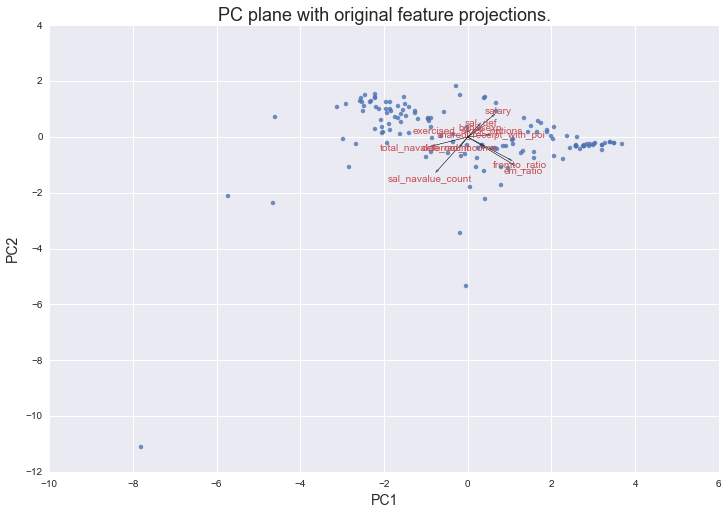

In [625]:
plt.figure(figsize=(12, 8))
sns.regplot(transformed[:, 0], transformed[:, 1], fit_reg=False)
feature_vectors = clf.best_estimator_.named_steps['pca'].components_.T
arrow_size, text_pos = 2.0, 2.5
for i, v in enumerate(feature_vectors):
    plt.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
              head_width=0.05, head_length=0.1)
    plt.text(v[0]*text_pos, v[1]*text_pos, features_list[i+1], color='r', 
             ha='center', va='center', fontsize=10)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("PC plane with original feature projections.", fontsize=18)
plt.show()

In [527]:
features_list

['poi',
 'salary',
 'exercised_stock_options',
 'shared_receipt_with_poi',
 'nonsal_ratio',
 'em_ratio',
 'has_email_data',
 'total_navalue_count',
 'total_total',
 'sal_navalue_count',
 'fromto_ratio']

In [528]:
from sklearn import decomposition, preprocessing

ptest = pdata[features_list[1:]]

# ptest = pdata.drop(['poi'], axis=1)
 
pca = PCA(n_components=2)

scaled_data = preprocessing.scale(ptest)

pca.fit(scaled_data)

transformed = pca.transform(scaled_data)

In [529]:
transformed

array([[ -1.62589489,   0.09457769],
       [  2.78627829,  -0.30079309],
       [ -0.94078342,   0.64204176],
       [  0.42433822,  -2.20627769],
       [  0.33642511,  -0.28103402],
       [  2.06213812,  -0.69067747],
       [ -0.91488762,   0.56405547],
       [ -3.13072883,   1.07415548],
       [  1.31460471,  -0.48925708],
       [ -0.95665656,   0.66473784],
       [ -1.83620156,   0.94201037],
       [ -2.32685494,   1.24371677],
       [  2.58961832,  -0.30993901],
       [ -2.54020079,   1.40955625],
       [  0.67656486,   0.94805317],
       [ -0.02426034,  -0.28660338],
       [  0.35488226,  -0.36587419],
       [ -2.22540028,   0.27910186],
       [ -2.31998478,   1.30137961],
       [ -1.40781306,   1.08179699],
       [ -2.49303579,   0.91683285],
       [  3.03544346,  -0.23257953],
       [  2.28077517,  -0.79985727],
       [  3.39882042,  -0.18709285],
       [ -1.96024066,   1.02009755],
       [  1.90178294,   0.25825492],
       [ -1.19209978,   0.63702045],
 

In [382]:
count = 0
for el in transformed:
    print(count, el[0])
    count += 1

(0, -3.5088252138932341)
(1, 2.3875457659389134)
(2, -0.29778839293477538)
(3, -0.64508161029049549)
(4, 0.40792025416982419)
(5, 1.700726277058958)
(6, -0.78710049745077681)
(7, -5.0522890128030671)
(8, 1.6634338235542239)
(9, -0.82273186521434849)
(10, -1.6251478313810237)
(11, -2.1252729157025971)
(12, 2.1139030551008657)
(13, -2.4797573422259171)
(14, 1.0677445364700058)
(15, 0.18965272140844625)
(16, 0.3993407148708647)
(17, -2.280436893145287)
(18, -2.3497799025703165)
(19, -1.122971956544546)
(20, -2.4785018781150634)
(21, 2.5858636320696369)
(22, 2.8090825052406094)
(23, 2.9852234102225119)
(24, -1.9339920600142)
(25, 2.3052489913707923)
(26, -1.0386097384904955)
(27, 1.0348731080180387)
(28, -1.2337012036521757)
(29, -2.4505937364618502)
(30, -2.9412711068575725)
(31, -0.097487847357649426)
(32, -1.8101634123646519)
(33, 0.35283136100473322)
(34, -0.19329962118239194)
(35, -2.3020792205227059)
(36, 2.38229187752653)
(37, -1.3050119768757462)
(38, 0.83488581716050314)
(39, 0.39

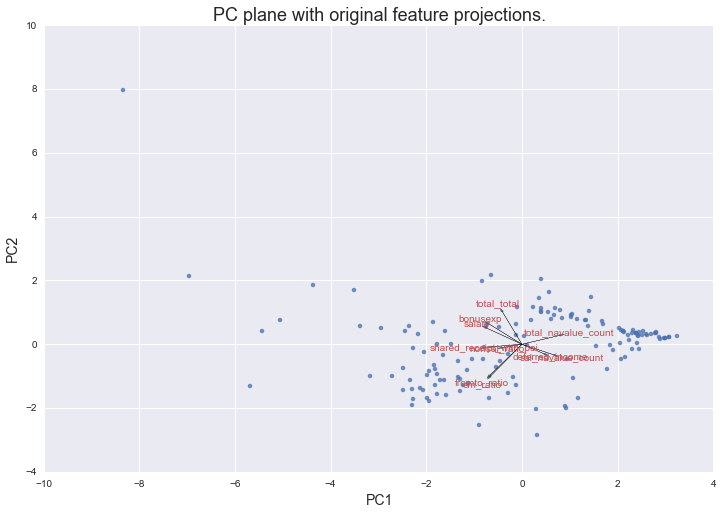

In [383]:
plt.figure(figsize=(12, 8))
sns.regplot(transformed[:, 0], transformed[:, 1], fit_reg=False)
feature_vectors = pca.components_.T
arrow_size, text_pos = 2.0, 2.5
for i, v in enumerate(feature_vectors):
    plt.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
              head_width=0.05, head_length=0.1)
    plt.text(v[0]*text_pos, v[1]*text_pos, ptest.columns[i], color='r', 
             ha='center', va='center', fontsize=10)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("PC plane with original feature projections.", fontsize=18)
plt.show()